# I.Data loading and EDA

In [44]:
import pandas as pd

In [45]:
df = pd.read_excel("D:/hmeq.xls")
df.head()

,REASON,JOB,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,DEBTINC,gDEBTINC
0,NaN,NaN,0,4400,NaN,60250.0,NaN,NaN,NaN,NaN,NaN,NaN,3
1,HomeImp,Other,1,2300,37626.0,46200.0,3.0,0.0,1.0,122.266667,1.0,NaN,3
2,DebtCon,NaN,0,5400,53429.0,64505.0,5.0,NaN,0.0,69.542430,NaN,36.480236,1
3,HomeImp,Mgr,0,3600,61327.0,76484.0,9.0,NaN,2.0,202.510775,0.0,41.516390,1
4,HomeImp,Office,0,3800,51180.0,63459.0,20.0,0.0,0.0,203.751534,0.0,20.067042,1


In [46]:
df.shape

(5960, 13)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REASON    5708 non-null   object 
 1   JOB       5681 non-null   object 
 2   BAD       5960 non-null   int64  
 3   LOAN      5960 non-null   int64  
 4   MORTDUE   5442 non-null   float64
 5   VALUE     5848 non-null   float64
 6   YOJ       5445 non-null   float64
 7   DEROG     5252 non-null   float64
 8   DELINQ    5380 non-null   float64
 9   CLAGE     5652 non-null   float64
 10  NINQ      5450 non-null   float64
 11  DEBTINC   4693 non-null   float64
 12  gDEBTINC  5960 non-null   int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 605.4+ KB


In [48]:
df.isna().sum()

REASON       252
JOB          279
BAD            0
LOAN           0
MORTDUE      518
VALUE        112
YOJ          515
DEROG        708
DELINQ       580
CLAGE        308
NINQ         510
DEBTINC     1267
gDEBTINC       0
dtype: int64

In [49]:
df = df.drop_duplicates()

Dữ liệu gồm các biến:

BAD: Biến mục tiêu (1 = vỡ nợ, 0 = không vỡ nợ)

LOAN: Số tiền vay

MORTDUE: Số tiền nợ trên thế chấp

VALUE: Giá trị tài sản

YOJ: Số năm làm việc

DEROG: Số lần bị đánh giá tiêu cực tín dụng

DELINQ: Số lần thanh toán chậm

CLAGE: Tuổi trung bình của tài khoản tín dụng

NINQ: Số lượng truy vấn tín dụng gần đây

CLNO: Số lượng tài khoản tín dụng

DEBTINC: Tỷ lệ nợ trên thu nhập

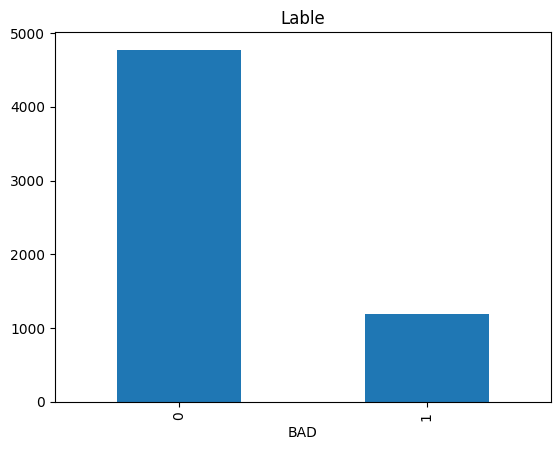

In [50]:
import matplotlib.pyplot as plt

plt.figure()
df["BAD"].value_counts().plot(kind="bar")
plt.title("Lable")
plt.show()

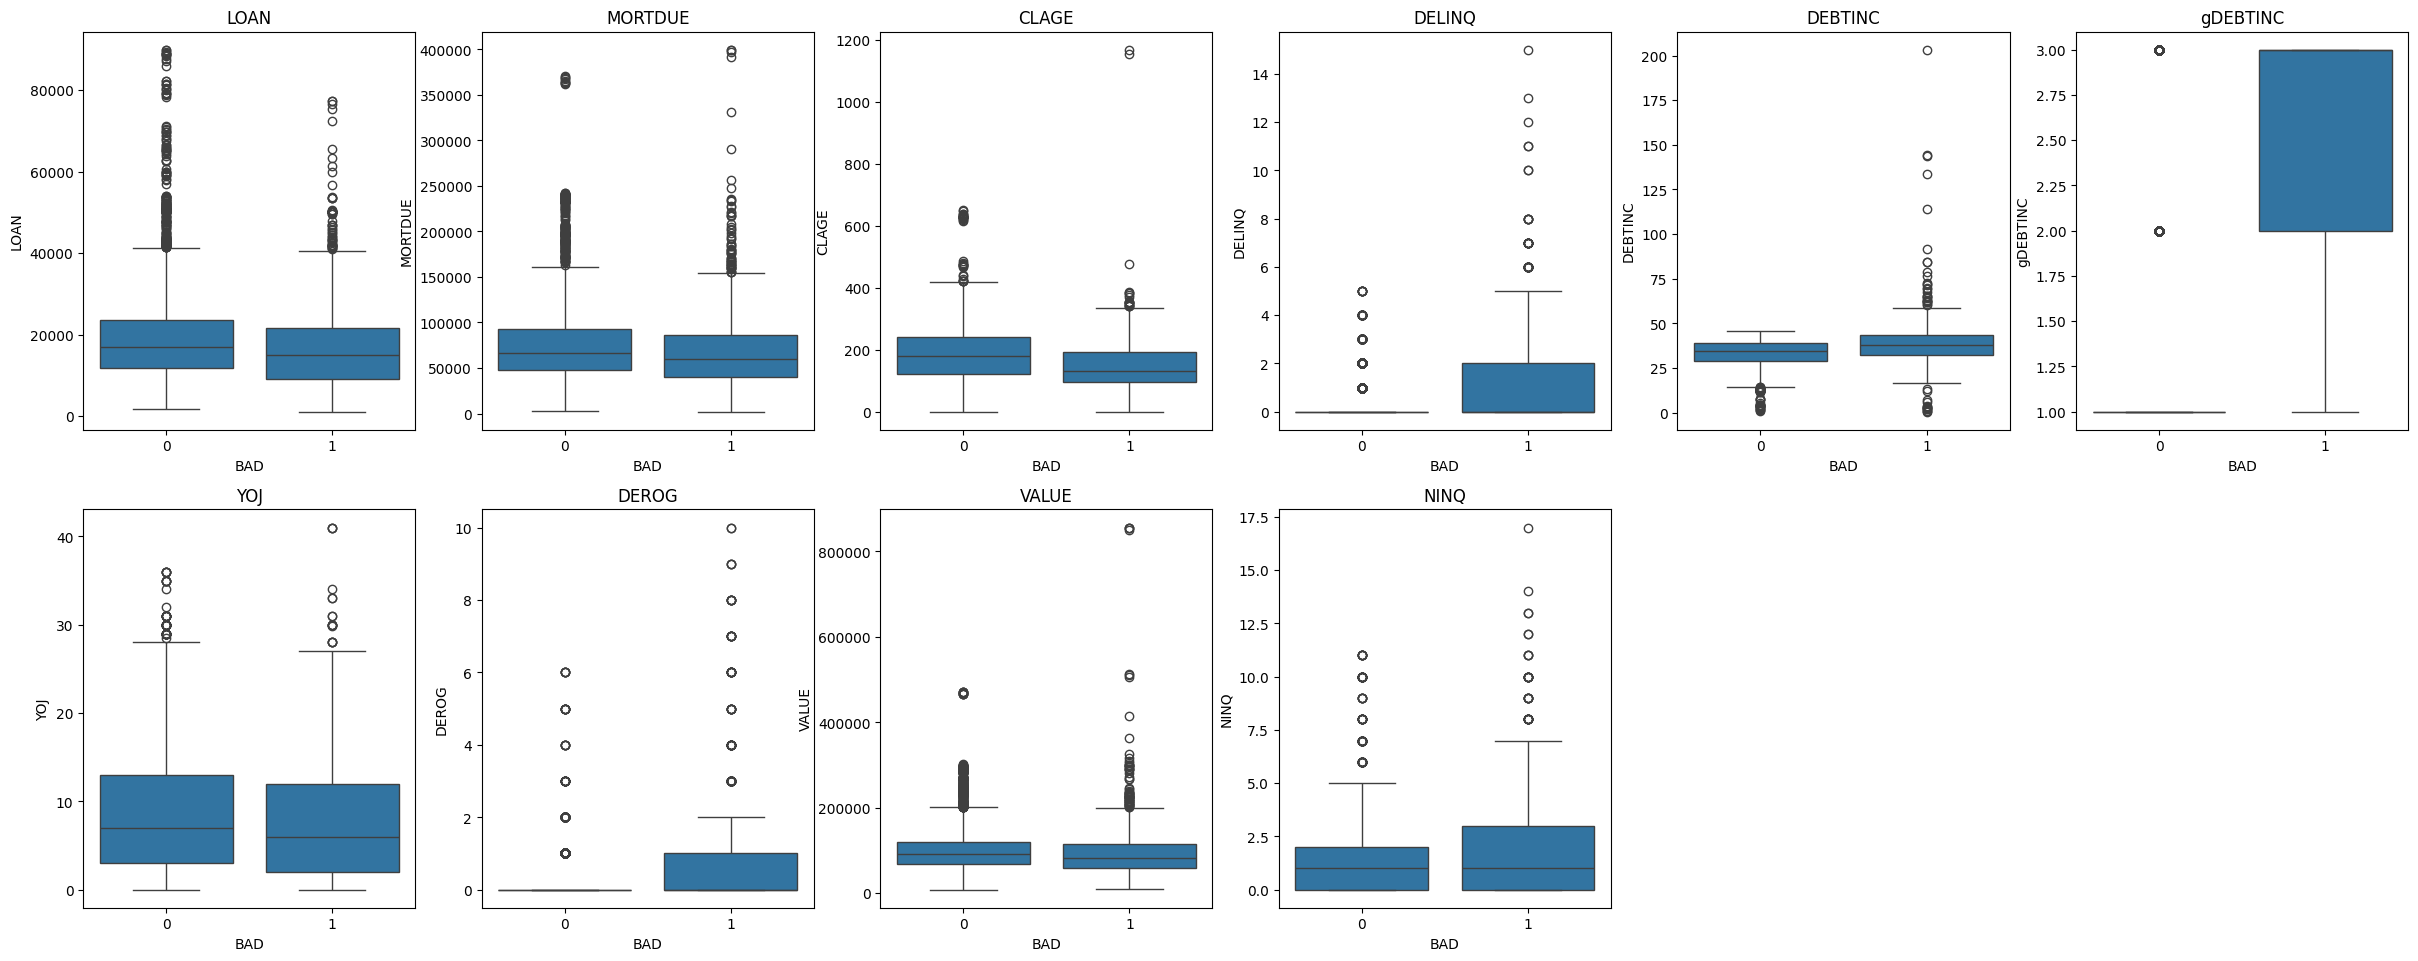

In [51]:
# Visualize boxplots of numerical columns
import seaborn as sns

feature_cols = list(set(df.columns) - {'REASON','JOB'})
feature_colss = list(set(df.columns)-{'REASON','JOB','BAD'})
plt.figure(figsize = (30,30))
for i, col in enumerate(feature_colss):
    plt.subplot(5,6, i +1)
    sns.boxplot(x ="BAD", y = col, data = df)
    plt.title(col)
    
plt.show()

<Axes: >

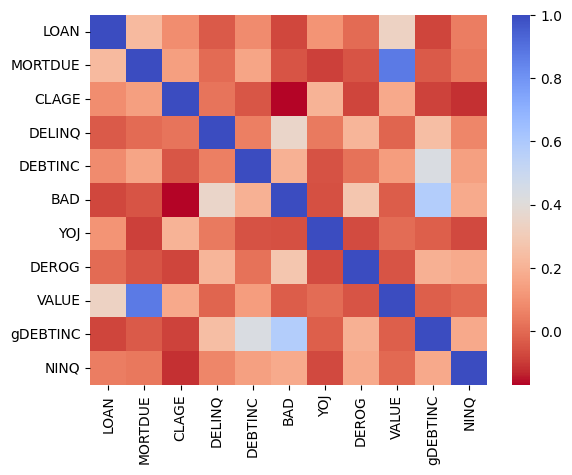

In [52]:
# Correlation in the training set
C = df[feature_cols].corr()
sns.heatmap(C, cmap = 'coolwarm_r')

In [53]:
# Determine correlation order between the target and features
import numpy as np
C.sort_values(by = 'BAD', ascending = False, inplace = True)

print(np.round(C['BAD'][1:], 2))

gDEBTINC    0.58
DELINQ      0.35
DEROG       0.28
DEBTINC     0.20
NINQ        0.17
VALUE      -0.03
MORTDUE    -0.05
YOJ        -0.06
LOAN       -0.08
CLAGE      -0.17
Name: BAD, dtype: float64


# II. Datapreprocessing

## 1. Train,test,spltting

In [54]:
from sklearn.model_selection import train_test_split

target = "BAD"
x = df.drop(target, axis=1)
y = df[target]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)


In [55]:
x_train 

,REASON,JOB,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,DEBTINC,gDEBTINC
944,HomeImp,Other,7400,2063.0,100448.0,NaN,0.0,0.0,96.133333,0.0,NaN,3
5755,HomeImp,ProfExe,14100,98856.0,143292.0,13.0,0.0,0.0,105.771726,4.0,37.458280,1
2259,HomeImp,Other,9600,77359.0,101365.0,1.0,0.0,0.0,182.803514,0.0,33.481910,1
12,DebtCon,Mgr,5000,72517.0,86250.0,19.0,0.0,1.0,300.366667,1.0,NaN,3
1117,DebtCon,Mgr,13500,40023.0,67357.0,NaN,NaN,NaN,NaN,NaN,38.319426,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,DebtCon,Other,15800,71820.0,89739.0,0.0,1.0,1.0,122.955587,1.0,33.519070,1
5191,DebtCon,ProfExe,13500,80223.0,108491.0,4.0,0.0,4.0,127.800000,2.0,NaN,3
5226,DebtCon,Other,25000,188545.0,241279.0,9.0,0.0,0.0,102.500000,2.0,NaN,3
5390,DebtCon,Other,15900,69548.0,89775.0,1.0,0.0,0.0,230.673080,2.0,30.108317,1


## 2. Sử dụng Woe và IV để lọc ra các biến quan trọng

In [56]:
import pandas as pd
from optbinning import BinningProcess
import matplotlib.pyplot as plt

# Khởi tạo quá trình binning cho tất cả biến
binning_process = BinningProcess(
    variable_names=x_train.columns.tolist(),
    categorical_variables=x_train.select_dtypes(include="object").columns.tolist()
)

# Huấn luyện binning process để tính WOE, IV
binning_process.fit(x_train, y_train)



BinningProcess(categorical_variables=['REASON', 'JOB'],
               variable_names=['REASON', 'JOB', 'LOAN', 'MORTDUE', 'VALUE',
                               'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
                               'DEBTINC', 'gDEBTINC'])

In [57]:
# Lấy IV cho tất cả biến
iv_dict = {}

for var in x_train.columns:
    optb = binning_process.get_binned_variable(var)
    if optb is not None:
        bin_table = optb.binning_table
        bin_table.build()  # phải gọi build trước
        iv_dict[var] = bin_table.iv

In [58]:
# Chuyển sang Series và sắp xếp
iv_series = pd.Series(iv_dict).sort_values(ascending=False)

# In bảng IV
print("Thông tin IV của các biến:")
print(iv_series)


Thông tin IV của các biến:
DEBTINC     2.039605
gDEBTINC    1.912674
DELINQ      0.534097
VALUE       0.516047
DEROG       0.335648
CLAGE       0.249556
LOAN        0.211473
NINQ        0.153149
JOB         0.146214
YOJ         0.069360
MORTDUE     0.054816
REASON      0.004552
dtype: float64


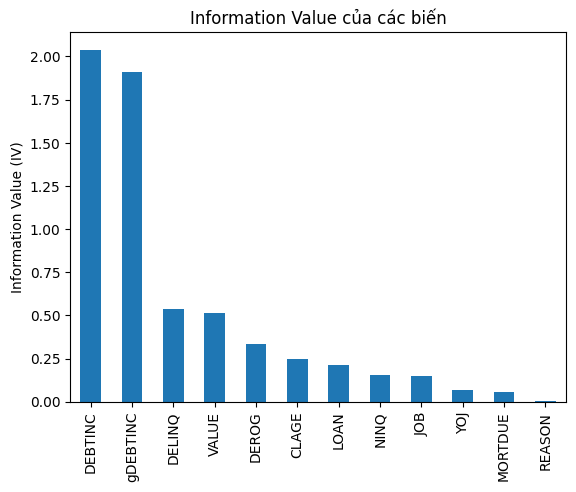


Các biến được chọn (IV >= 0.02):
['DEBTINC', 'gDEBTINC', 'DELINQ', 'VALUE', 'DEROG', 'CLAGE', 'LOAN', 'NINQ', 'JOB', 'YOJ', 'MORTDUE']


In [59]:
# Vẽ biểu đồ IV
iv_series.plot(kind="bar", title="Information Value của các biến")
plt.ylabel("Information Value (IV)")
plt.show()

# Chọn các biến có IV >= 0.02 (tùy ngưỡng)
important_features = iv_series[iv_series >= 0.02].index.tolist()

print("\nCác biến được chọn (IV >= 0.02):")
print(important_features)

### Xóa bỏ biến REASON vì IV < 0.02


In [60]:
reason = "REASON"
x_train_woe = x_train.drop(reason,axis=1)
x_test_woe = x_test.drop(reason,axis= 1)
x_test_woe

,JOB,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,DEBTINC,gDEBTINC
1344,ProfExe,17100,100082.0,119585.0,1.0,0.0,0.0,147.915809,0.0,34.734277,1
625,NaN,15000,NaN,74750.0,NaN,NaN,NaN,NaN,NaN,NaN,3
5908,ProfExe,14900,97646.0,139884.0,13.0,0.0,0.0,119.083116,5.0,36.360597,1
2991,Mgr,8500,53459.0,62678.0,13.0,0.0,0.0,116.863449,0.0,30.052902,1
1545,ProfExe,17800,58942.0,91483.0,5.0,0.0,0.0,123.736674,0.0,28.155960,1
...,...,...,...,...,...,...,...,...,...,...,...
3688,Other,33900,13154.0,62208.0,1.0,0.0,0.0,111.980657,1.0,37.466977,1
2404,ProfExe,14100,79345.0,135554.0,15.0,0.0,0.0,301.563991,0.0,29.178133,1
1173,ProfExe,15500,36650.0,62963.0,6.0,0.0,0.0,260.856789,0.0,24.299059,1
3209,Office,28900,77916.0,130728.0,2.0,0.0,0.0,290.772608,1.0,39.095476,1


## 3.Fill missing value and normalization


### xử lí các biến số bằng 'median' và StandardScaler để chuẩn hóa trước khi cho vao mô hình

In [61]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
nums_transform = Pipeline(steps= [
    ("imputers", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

### xử lí missing của cột JOB bằng 'most_frequent' và OnehotEncoder để số hóa chúng trước khi cho vào mô hình 

In [62]:
JOB = x_train_woe["JOB"].unique()
nom_transform = Pipeline(steps=[
   ("imputer",SimpleImputer(strategy="most_frequent")),
   ("scale",OneHotEncoder(sparse_output= False))
])

In [63]:
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(transformers=[
    ("nums_transform", nums_transform, ["MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "DEBTINC"]),
    ("one_transform", nom_transform, ["JOB"]),
])


## 3. Imbalance data

### Tránh mất căn bằng dữ liệu giúp mô hình được train tốt hơn

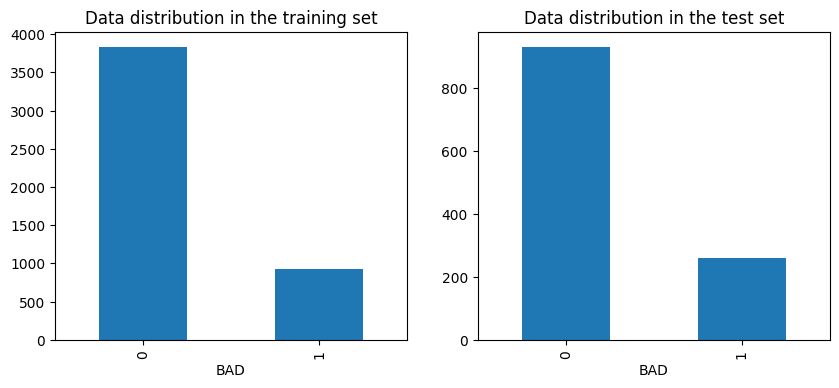

In [64]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar')
plt.title('Data distribution in the training set')


plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar')
plt.title('Data distribution in the test set')


plt.show()

In [65]:
from imblearn.over_sampling import RandomOverSampler 

ROS = RandomOverSampler(random_state = 42)
x_train_ros, y_train_ros = ROS.fit_resample(x_train_woe, y_train)

df_train_ros = pd.merge(x_train_ros, y_train_ros, left_index = True, right_index = True)

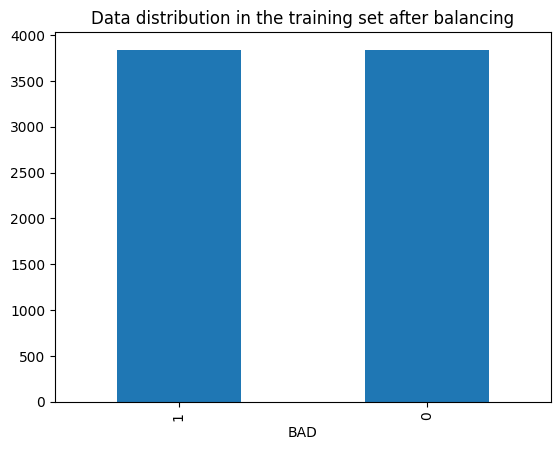

In [66]:
plt.figure()
df_train_ros['BAD'].value_counts().plot(kind = 'bar')
plt.title('Data distribution in the training set after balancing')
plt.show()

# III.Train model  

In [67]:
# Khởi tạo 2 mô hình LogisticRegression và RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

reg = Pipeline(steps= [
    ("procession",preprocess),
    ("model", LogisticRegression(solver='saga')),
])

reg1 = Pipeline(steps= [
    ("procession",preprocess),
    ("model", RandomForestClassifier()),
])

reg2 = Pipeline(steps= [
    ("procession",preprocess),
    ("model", GradientBoostingClassifier()),
])

reg3 = Pipeline(steps= [
    ("procession",preprocess),
    ("model", SVC(probability=True)),
])

## Khởi tạo hàm train model và hàm vẽ confusion matrix

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Define training function
def training(model, params, X_train, y_train, X_test, y_test):
    grid_search_model = GridSearchCV(model, params, cv = 5, scoring = 'accuracy')
    grid_search_model.fit(X_train, y_train)
    print('Best parameters: ', grid_search_model.best_params_)
    best_model = grid_search_model.best_estimator_
    
    # evaluate the model on the test set 
    y_pred = best_model.predict(X_test)
    print('Balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred))
    return grid_search_model, y_pred

# function to visualize confution matrix
def plot_CF(CF_mat):
    plt.figure(figsize = (4,3))
    sns.heatmap(CF_mat, annot = True, fmt = 'd', cmap = 'Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.show()

## Khởi tạo hàm vẽ đường cong ROC

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_auc(y_true, y_scores, pos_label=1):
    fpr, tpr, _ = roc_curve(y_true, y_scores, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Đường chéo
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (AUC)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


### 1. LogisticRegression

In [70]:
log_params = {
    'model__penalty': ['elasticnet', None],
    'model__class_weight': ['balanced'],
    'model__l1_ratio': [0.5]
}
GS_log, y_pred_log = training(reg,log_params ,x_train_ros, y_train_ros, x_test, y_test)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


Best parameters:  {'model__class_weight': 'balanced', 'model__l1_ratio': 0.5, 'model__penalty': None}
Balanced_accuracy_score:  0.732015516672169


C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


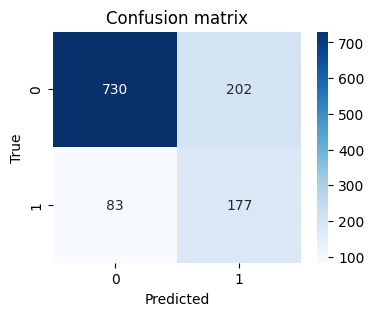

In [71]:
C_log = confusion_matrix(y_test, y_pred_log)
plot_CF(C_log)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


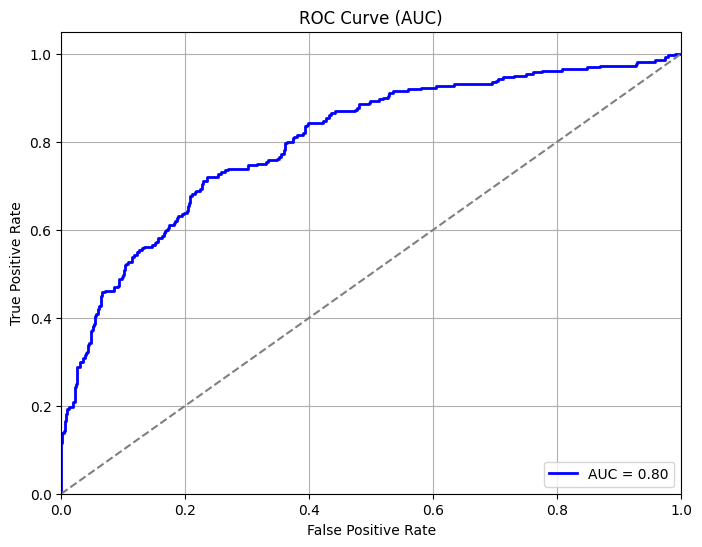

In [72]:
# Vẽ ROC Curve
reg.fit(x_train_ros,y_train_ros)
y_scores = reg.predict_proba(x_test)[:, 1]
plot_auc(y_test, y_scores)

### 2. Randomforest

In [73]:
rf_params = {
    'model__n_estimators': [100, 200],
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__max_depth': [10, 12, 15]
}

GS_rf, y_pred_rf = training(reg1, rf_params, x_train_ros, y_train_ros, x_test, y_test)

Best parameters:  {'model__criterion': 'gini', 'model__max_depth': 15, 'model__n_estimators': 100}
Balanced_accuracy_score:  0.8451799273687686


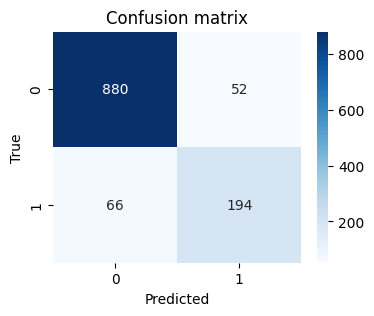

In [74]:
C_rf = confusion_matrix(y_test, y_pred_rf)
plot_CF(C_rf)

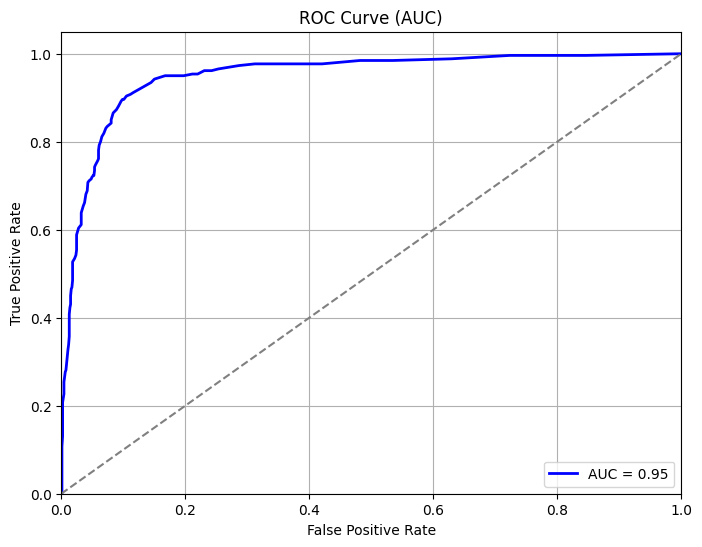

In [75]:
# Vẽ ROC Curve
reg1.fit(x_train_ros,y_train_ros)
y_scores = reg1.predict_proba(x_test)[:, 1]
plot_auc(y_test, y_scores)

### 3.GradientBoosting

In [76]:
gbc_params = {
    'model__max_depth': [2,4,6,8],
}

GS_gbc, y_pred_gbc = training(reg2, gbc_params, x_train_ros, y_train_ros, x_test, y_test)

Best parameters:  {'model__max_depth': 8}
Balanced_accuracy_score:  0.819197755034665


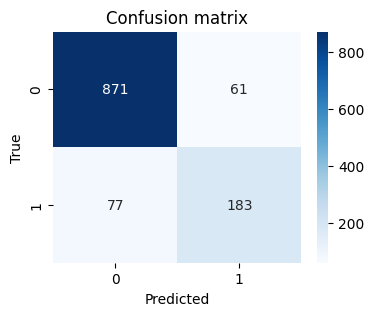

In [77]:
C_gbc = confusion_matrix(y_test, y_pred_gbc)
plot_CF(C_gbc)

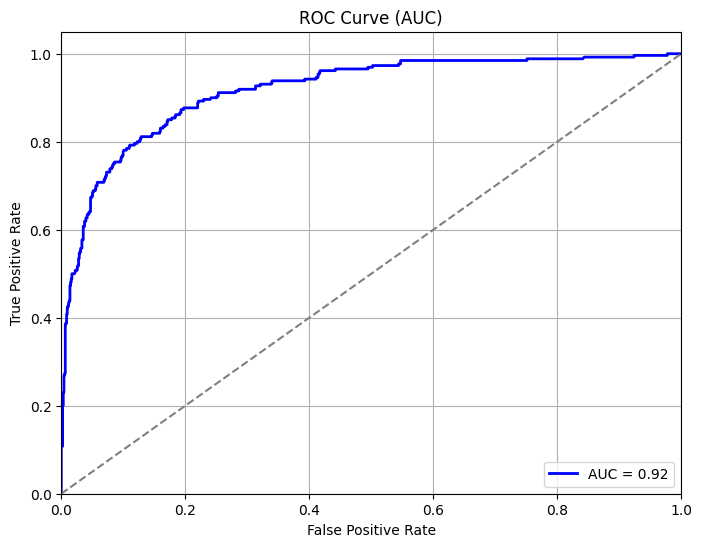

In [78]:
# Vẽ ROC Curve
reg2.fit(x_train_ros,y_train_ros)
y_scores = reg2.predict_proba(x_test)[:, 1]
plot_auc(y_test, y_scores)

### 4. Support vector machine


In [79]:
svm_params = {
    'model__C': [0.1, 0.5, 1],
    'model__kernel': ['rbf', 'linear', 'poly']
}

GS_svm, y_pred_svm = training(reg3, svm_params, x_train_ros, y_train_ros, x_test, y_test)

Best parameters:  {'model__C': 1, 'model__kernel': 'rbf'}
Balanced_accuracy_score:  0.7840623968306372


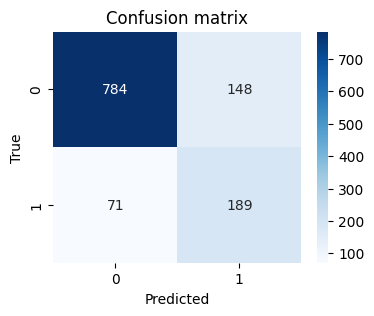

In [80]:
C_svm = confusion_matrix(y_test, y_pred_svm)
plot_CF(C_svm)

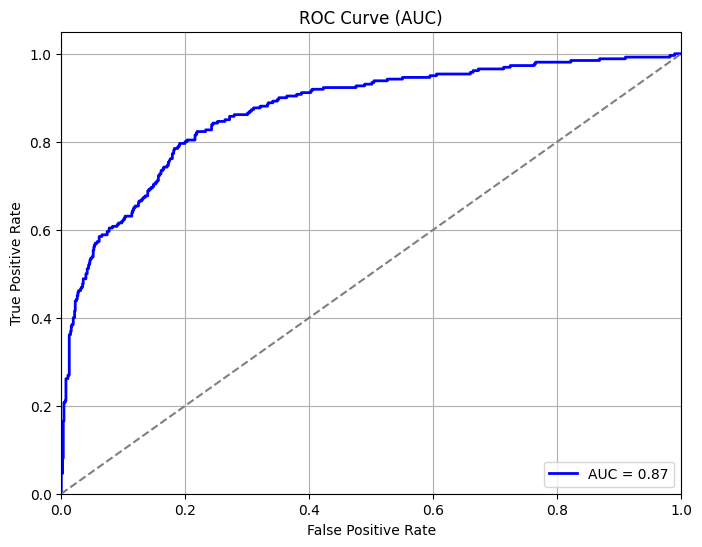

In [81]:
# Vẽ ROC Curve
reg3.fit(x_train_ros,y_train_ros)
y_scores = reg3.predict_proba(x_test)[:, 1]
plot_auc(y_test, y_scores)